# Exploratory Data Analysis (EDA) on the Titanic Dataset

**Task:** EDA (Data Analyst Internship Task 5)


In [2]:
# Cell: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# visualization settings
%matplotlib inline
sns.set(style="whitegrid", context='notebook')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Cell: Load dataset (seaborn built-in Titanic)
titanic = sns.load_dataset('titanic') 
df = titanic.copy()
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Cell: Quick info and summary
print("Shape:", df.shape)
print("\nInfo:")
df.info()
print("\nNumerical Describe:")
display(df.describe(include=[np.number]))
print("\nCategorical Describe:")
display(df.describe(include=['object','category','bool']))

Shape: (891, 15)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

Numerical Describe:


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Categorical Describe:


,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891,889,891,891,891,203,889,891,891
unique,2,3,3,3,2,7,3,2,2
top,male,S,Third,man,True,C,Southampton,no,True
freq,577,644,491,537,537,59,644,549,537


In [5]:
# Cell: Missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
pd.DataFrame({'missing_count': missing, 'missing_pct': missing_pct})

,missing_count,missing_pct
deck,688,77.22
age,177,19.87
embarked,2,0.22
embark_town,2,0.22
survived,0,0.00
pclass,0,0.00
sex,0,0.00
sibsp,0,0.00
parch,0,0.00
fare,0,0.00


In [6]:
# Cell: Basic counts
print("Unique values (sample):")
for col in ['survived','sex','class','embarked','who','alive','deck','embark_town','alone']:
    if col in df.columns:
        print(f"\n{col} value counts:")
        display(df[col].value_counts(dropna=False))

Unique values (sample):

survived value counts:


survived
0    549
1    342
Name: count, dtype: int64


sex value counts:


sex
male      577
female    314
Name: count, dtype: int64


class value counts:


class
Third     491
First     216
Second    184
Name: count, dtype: int64


embarked value counts:


embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64


who value counts:


who
man      537
woman    271
child     83
Name: count, dtype: int64


alive value counts:


alive
no     549
yes    342
Name: count, dtype: int64


deck value counts:


deck
NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: count, dtype: int64


embark_town value counts:


embark_town
Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: count, dtype: int64


alone value counts:


alone
True     537
False    354
Name: count, dtype: int64

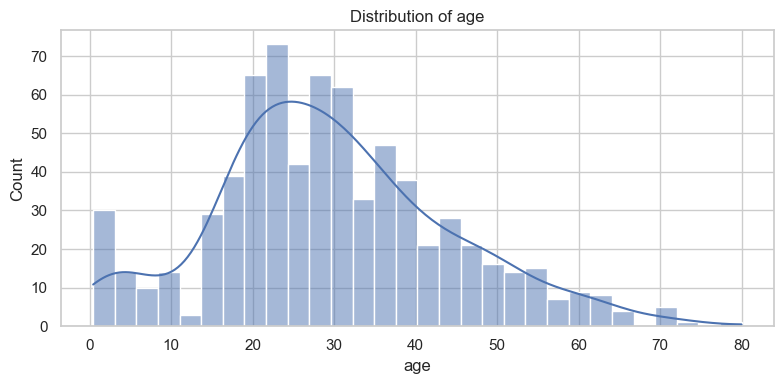

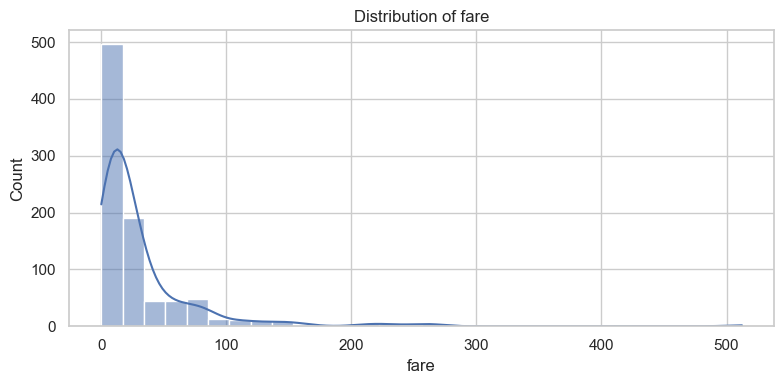

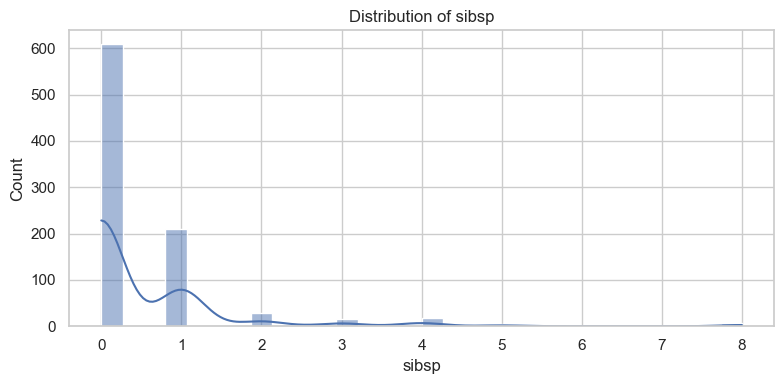

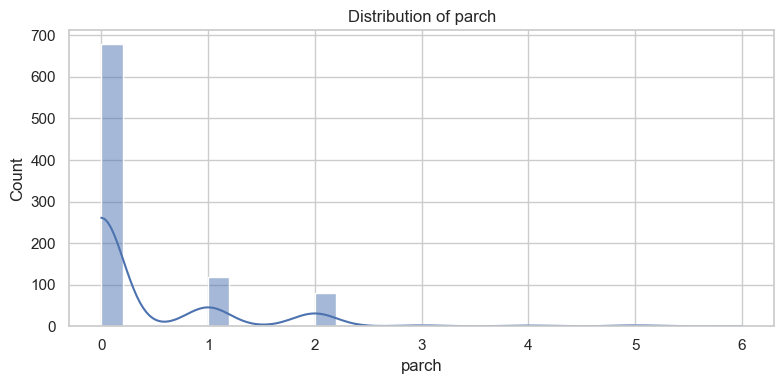

In [7]:
# Cell: Univariate visualizations - numerical
num_cols = ['age','fare','sibsp','parch']  # available numeric-ish columns
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

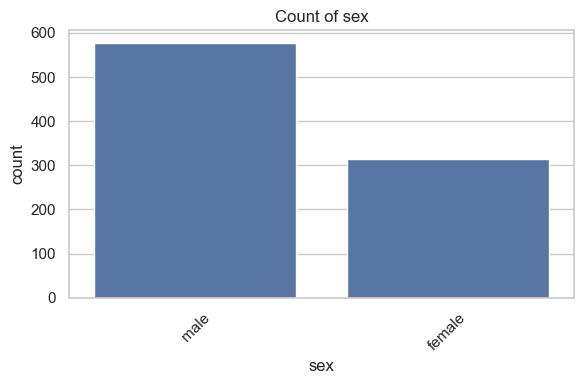

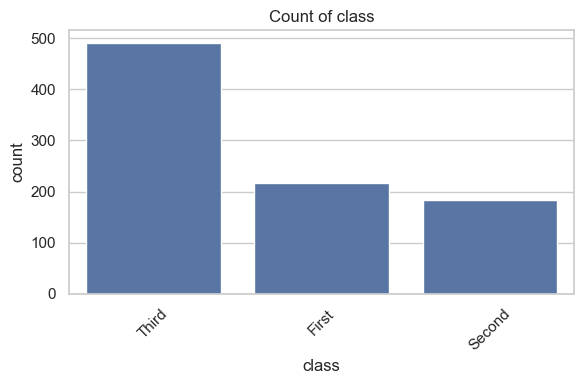

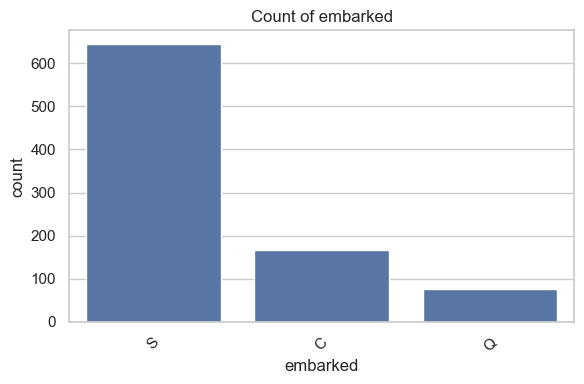

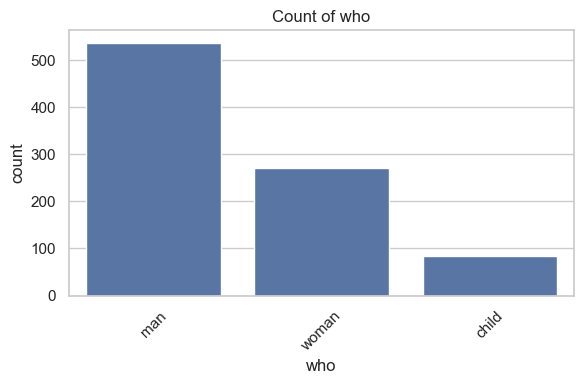

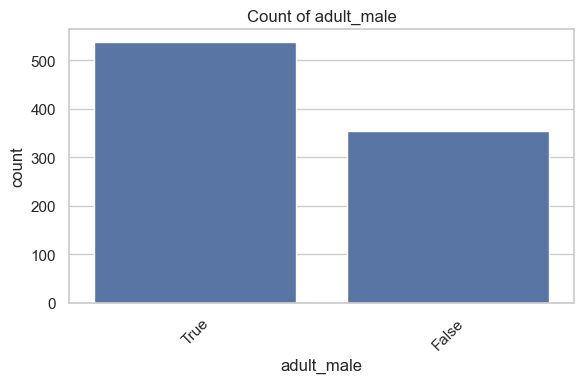

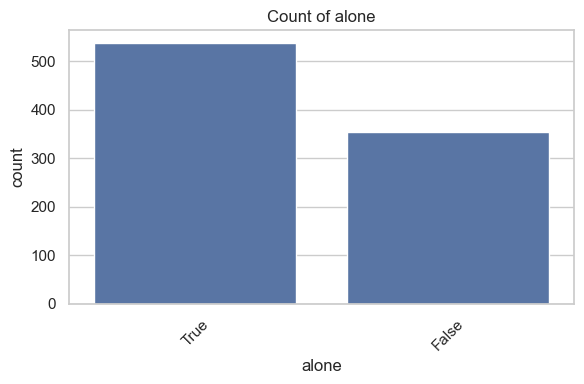

In [8]:
# Cell: Univariate - categorical barplots
cat_cols = ['sex','class','embarked','who','adult_male','alone']
for col in cat_cols:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f'Count of {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

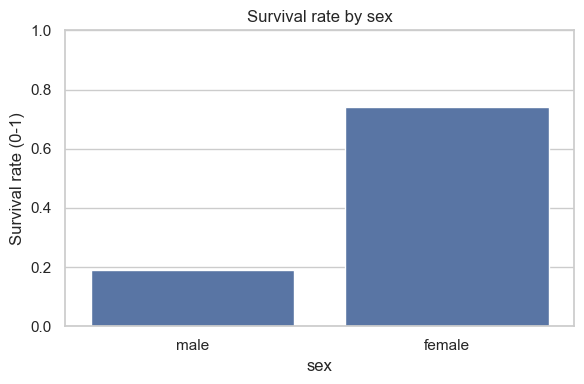

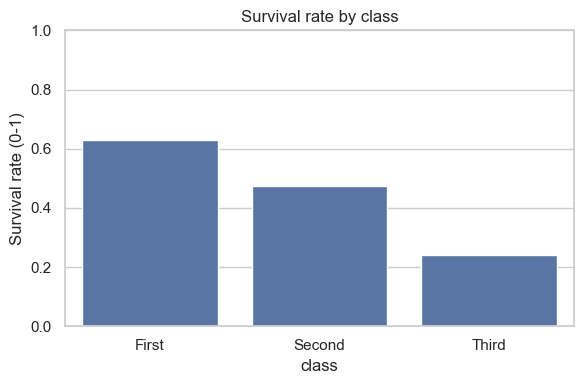

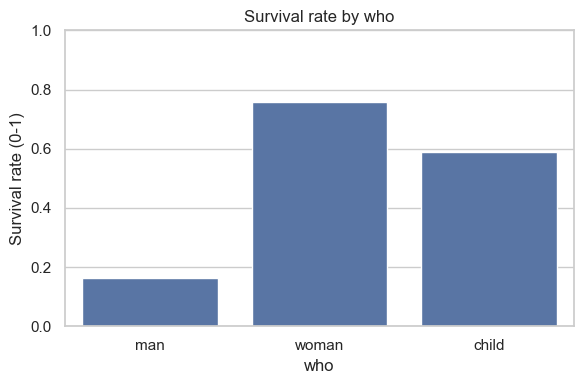

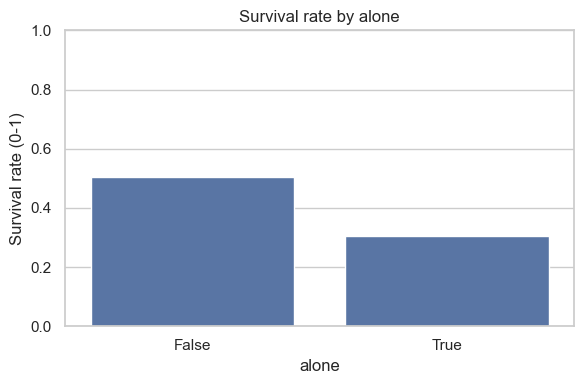

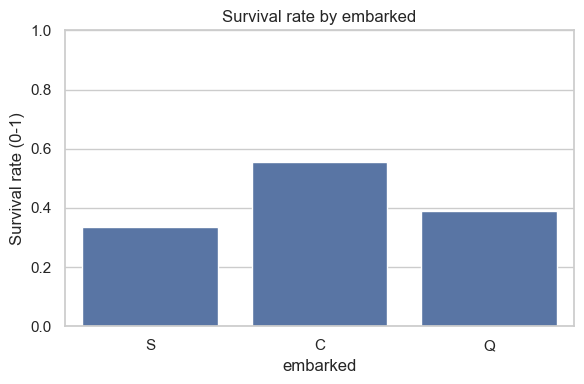

In [18]:
# Cell: Bivariate - Survival rate by categorical features
cat_features = ['sex','class','who','alone','embarked']
for col in cat_features:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.barplot(data=df, x=col, y='survived', errorbar=None)
        plt.title(f'Survival rate by {col}')
        plt.ylabel('Survival rate (0-1)')
        plt.ylim(0,1)
        plt.tight_layout()
        plt.show()

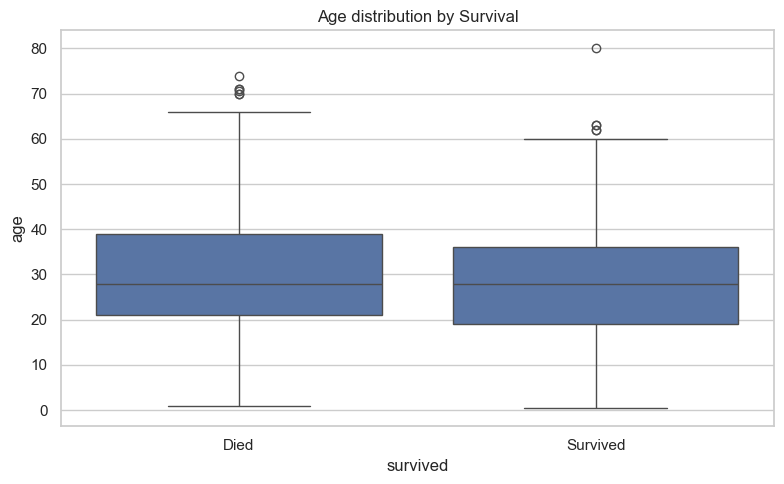

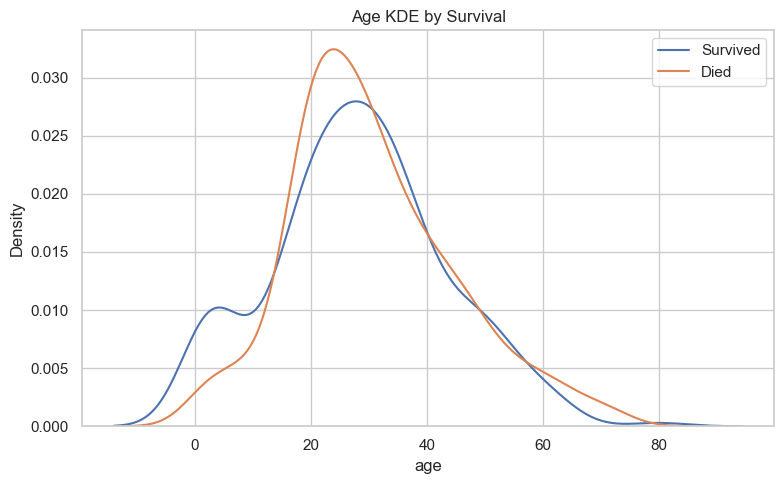

In [10]:
# Cell: Survival vs Age (numerical)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='survived', y='age')
plt.title('Age distribution by Survival')
plt.xticks([0,1], ['Died','Survived'])
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.kdeplot(data=df[df['survived']==1]['age'].dropna(), label='Survived')
sns.kdeplot(data=df[df['survived']==0]['age'].dropna(), label='Died')
plt.title('Age KDE by Survival')
plt.legend()
plt.tight_layout()
plt.show()

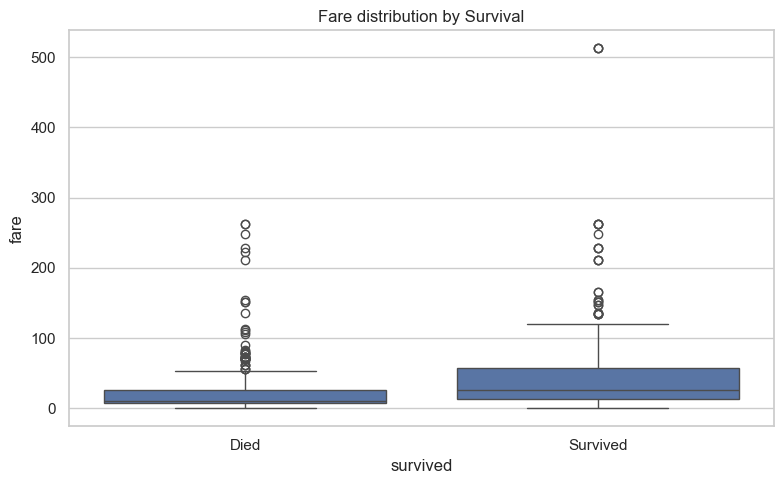

In [11]:
# Cell: Fare distribution by survival
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='survived', y='fare')
plt.title('Fare distribution by Survival')
plt.xticks([0,1], ['Died','Survived'])
plt.tight_layout()
plt.show()

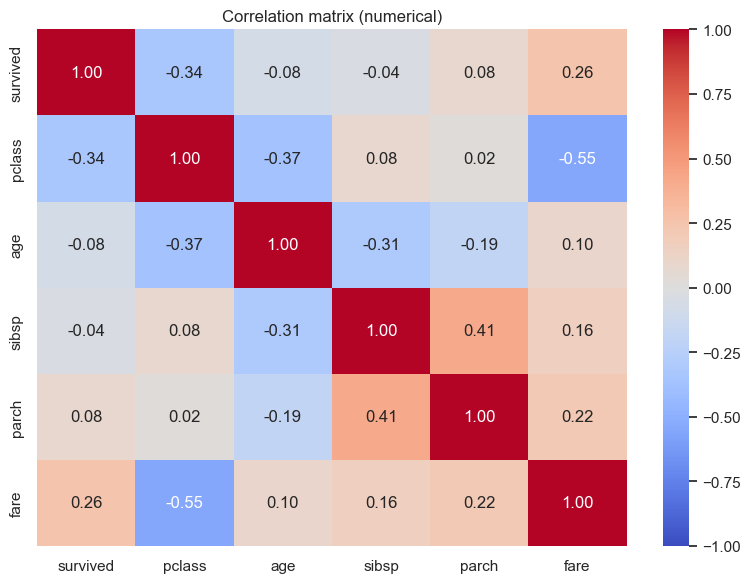

In [12]:
# Cell: Correlation heatmap (numerical features)
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation matrix (numerical)')
plt.tight_layout()
plt.show()

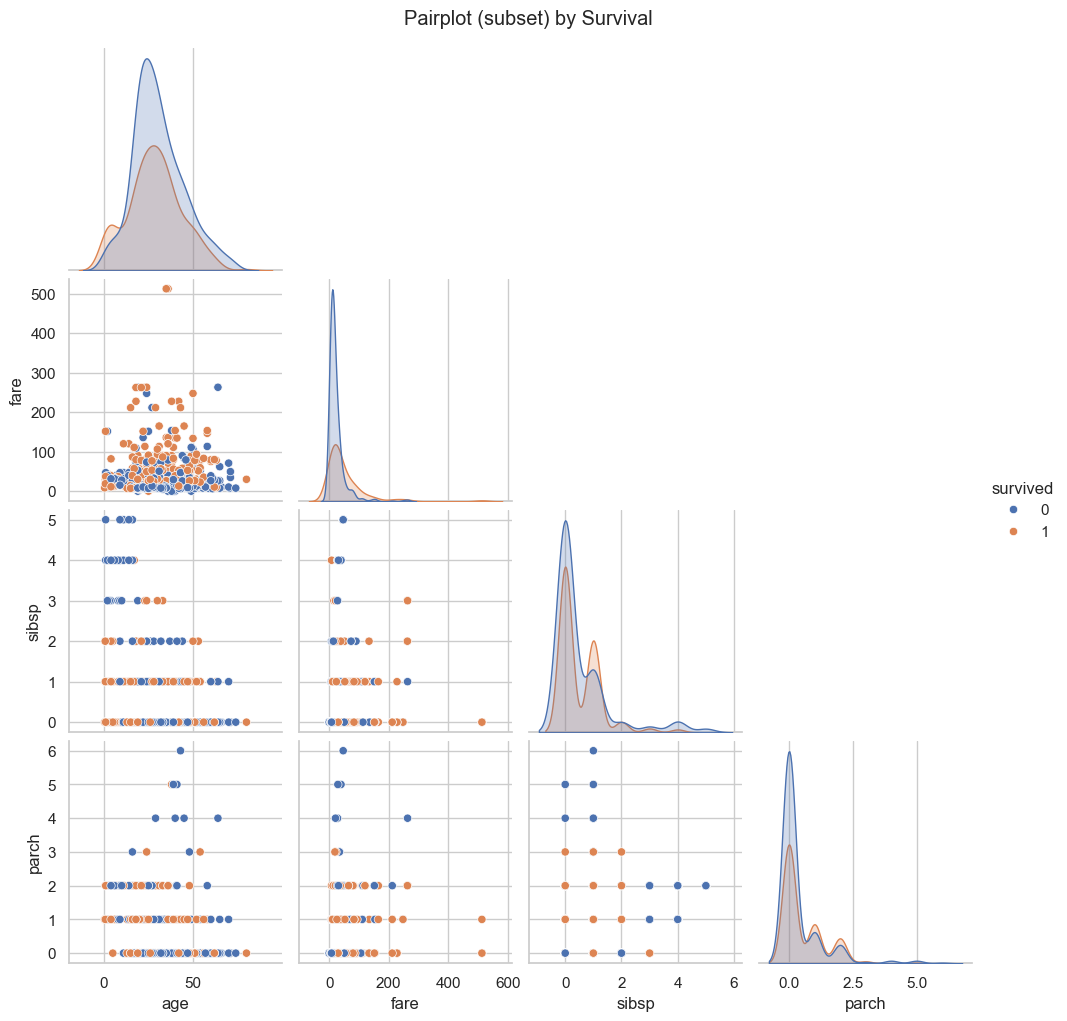

In [13]:
# Cell: Pairplot (subset, to speed up)
subset = df[['survived','age','fare','sibsp','parch']].dropna()
sns.pairplot(subset, hue='survived', diag_kind='kde', corner=True)
plt.suptitle('Pairplot (subset) by Survival', y=1.02)
plt.show()

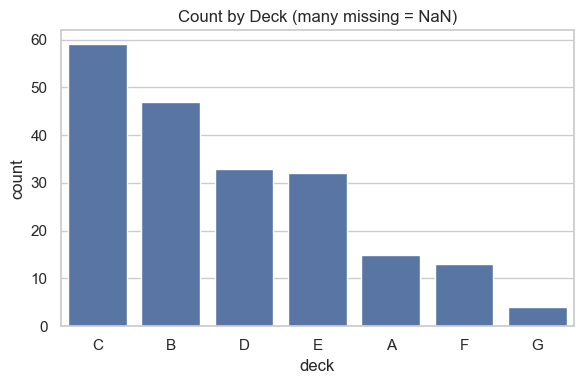

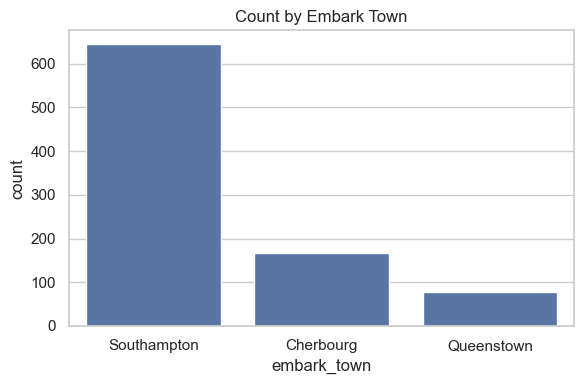

In [14]:
# Cell: Deck & Embarked - missingness insight
if 'deck' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='deck', order=df['deck'].value_counts().index)
    plt.title('Count by Deck (many missing = NaN)')
    plt.tight_layout()
    plt.show()

if 'embark_town' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='embark_town', order=df['embark_town'].value_counts().index)
    plt.title('Count by Embark Town')
    plt.tight_layout()
    plt.show()

In [24]:
df_fe = df.copy()

# Fill age with median
df_fe['age'] = df_fe['age'].fillna(df_fe['age'].median())

# Fill embark_town with mode (if exists)
if 'embark_town' in df_fe:
    df_fe['embark_town'] = df_fe['embark_town'].fillna(df_fe['embark_town'].mode()[0])

# Fill deck with 'Unknown' (if exists)
if 'deck' in df_fe:
    # Convert to string first, then fillna
    df_fe['deck'] = df_fe['deck'].astype(str).fillna('Unknown')

# Create family_size from sibsp + parch
df_fe['family_size'] = (df_fe['sibsp'].fillna(0) + df_fe['parch'].fillna(0)).astype(int)

df_fe[['age', 'family_size', 'deck']].head()

,age,family_size,deck
0,22.0,1,nan
1,38.0,1,C
2,26.0,0,nan
3,35.0,1,C
4,35.0,0,nan


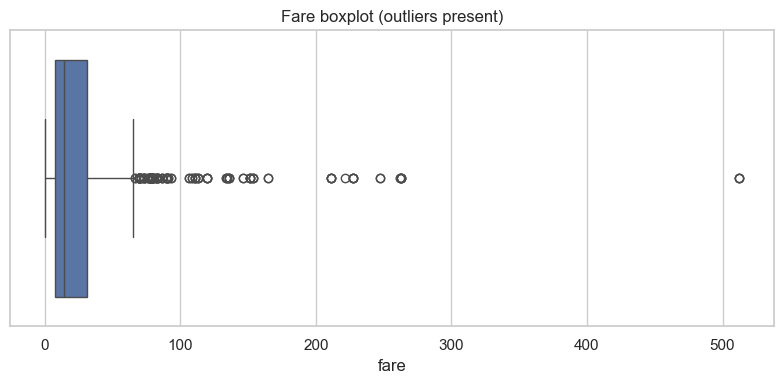

In [22]:
# Cell: Outliers check - fare
plt.figure(figsize=(8,4))
sns.boxplot(x=df_fe['fare'])
plt.title('Fare boxplot (outliers present)')
plt.tight_layout()
plt.show()

In [32]:
import pandas as pd
survival_by_class = df.groupby('class', observed=False)['survived']\
                      .mean()\
                      .sort_values(ascending=False)

print("Survival rate by class:")
print(survival_by_class)

age_bins = [0, 12, 18, 35, 60, 100]
age_labels = ['0-12', '13-18', '19-35', '36-60', '61-100']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

survival_by_age_group = df.groupby('age_group', observed=False)['survived'].mean()

print("\nSurvival rate by age group:")
print(survival_by_age_group)

Survival rate by class:
class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

Survival rate by age group:
age_group
0-12      0.579710
13-18     0.428571
19-35     0.382682
36-60     0.400000
61-100    0.227273
Name: survived, dtype: float64


# Conclusions & Recommendations
- Women had significantly higher survival rates than men.
- Passengers in higher classes (First) had higher survival rates.
- Children (0-12) show reasonably better survival relative to some adult groups; certain age groups had mixed outcomes.
- Higher fare correlates weakly with survival (likely proxy for class).
- Missing data: `age`, `deck`, `embark_town` notable — handle carefully before modeling.
- Recommendations: Impute missing values (median for age), encode categorical variables (one-hot or ordinal where appropriate), create features (family_size, is_alone), remove or cap fare outliers or transform (log).